In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


#설치한 폰트 사용
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
df = pd.read_csv('new_file.csv', low_memory=False)
df.head()

,year,rank,song_name,artist,likes,album_id,song_id,Release_date,Genre,Publisher,Agency
0,2022년,1,LOVE DIVE,IVE (아이브),"242,801",10909179,34847378,2022.04.05,댄스,카카오엔터테인먼트,스타쉽엔터테인먼트
1,2022년,2,TOMBOY,(여자)아이들,"241,400",10890384,34754292,2022.03.14,"록/메탈, R&B/Soul, 댄스, 랩/힙합",카카오엔터테인먼트,큐브 엔터테인먼트
2,2022년,52,MY BAG,(여자)아이들,"91,083",10890384,34754299,2022.03.14,"록/메탈, R&B/Soul, 댄스, 랩/힙합",카카오엔터테인먼트,큐브 엔터테인먼트
3,2022년,3,취중고백,김민석 (멜로망스),"173,287",10816959,34431086,2021.12.19,발라드,워너뮤직,프로젝트 리본
4,2022년,4,사랑인가 봐,멜로망스,"194,126",10871162,34657844,2022.02.18,"국내드라마, 발라드",카카오엔터테인먼트,플렉스엠


년도별 탑 100에 올린 소속사 갯수를 시각화

In [ ]:
import csv

In [ ]:
selected_columns = ['year', 'Agency']
df_sel= df[selected_columns]

# 선택한 열의 내용 출력
print(df_sel)

       year           Agency
0     2022년        스타쉽엔터테인먼트
1     2022년        큐브 엔터테인먼트
2     2022년        큐브 엔터테인먼트
3     2022년          프로젝트 리본
4     2022년             플렉스엠
...     ...              ...
1295  2010년             플레디스
1296  2010년        원오원엔터테인먼트
1297  2010년         엠넷미디어(주)
1298  2010년     BIGHIT MUSIC
1299  2010년  글로웍스 커뮤니케이션즈(주)

[1300 rows x 2 columns]


In [ ]:
# "이름" 열에서 특정 소속사를 포함한 행 추출
sel_SM = df_sel[df['Agency'].str.contains('SM', case=False)]
sel_YG = df_sel[df['Agency'].str.contains('YG', case=False)]
sel_JYP = df_sel[df['Agency'].str.contains('JYP', case=False)]
sel_BIGHIT = df_sel[df['Agency'].str.contains('BIGHIT', case=False)]

In [ ]:
ag=pd.concat([sel_SM, sel_YG, sel_JYP, sel_BIGHIT])

In [ ]:
print(ag)

       year            Agency
14    2022년  SM ENTERTAINMENT
17    2022년  SM ENTERTAINMENT
27    2022년  SM ENTERTAINMENT
28    2021년  SM ENTERTAINMENT
44    2022년  SM ENTERTAINMENT
...     ...               ...
563   2017년      BIGHIT MUSIC
671   2016년      BIGHIT MUSIC
1192  2011년      BIGHIT MUSIC
1209  2010년      BIGHIT MUSIC
1298  2010년      BIGHIT MUSIC

[295 rows x 2 columns]


In [ ]:
ag['year']=ag['year'].str.slice(0, 4)

In [ ]:
ag = ag.astype({'year':'int'})

In [ ]:
ag.sort_values(by = 'year')

,year,Agency
1298,2010,BIGHIT MUSIC
1210,2010,(주)YG엔터테인먼트
1211,2010,(주)YG엔터테인먼트
1212,2010,(주)YG엔터테인먼트
1213,2010,(주)YG엔터테인먼트
...,...,...
98,2022,SM ENTERTAINMENT
139,2022,BIGHIT MUSIC
86,2022,SM ENTERTAINMENT
7,2022,YG Entertainment


In [ ]:
#agency열 추가
ag['agency'] = '기타'

In [ ]:
for index, row in ag.iterrows():
    if row['Agency'] in ['SM ENTERTAINMENT', 'SM Entertainment']:
        ag.at[index, 'agency'] = 'SM'
    elif row['Agency'] in ['YG Entertainment', '(주)YG엔터테인먼트']:
        ag.at[index, 'agency'] = 'YG'
    elif row['Agency'] in ['㈜JYP엔터테인먼트', '(주)JYP엔터테인먼트', 'JYP', 'JYP Entertainment', 'JYP엔터테인먼트' ]:
        ag.at[index, 'agency'] = 'JYP'
    elif row['Agency'] in ['BIGHIT MUSIC', '빅히트']:
        ag.at[index, 'agency'] = 'BIGHIT'

In [ ]:
# '특정열' 열에서 '기타'가 있는 행 확인
rows_with_etc = ag[ag['agency'] == '기타']

# 결과 출력
print(rows_with_etc)

      year                                     Agency agency
636   2016  미스틱엔터테인먼트, 중앙ICS, (주)SM엔터테인먼트, (주)JYP엔터..     기타
639   2016                 ㈜SM엔터테인먼트, 모스트콘텐츠, (주)뮤직앤뉴     기타
712   2016                     FNC엔터테인먼트, (주)SM엔터테인먼트     기타
719   2016  Stone Music Entertainment, 냠냠 Ent, SM Ent     기타
636   2016  미스틱엔터테인먼트, 중앙ICS, (주)SM엔터테인먼트, (주)JYP엔터..     기타
992   2013                    JYP 엔터테인먼트 & 빅히트 엔터테인먼트     기타
996   2013                      AQ 엔터테인먼트, JYP 엔터테인먼트     기타
1059  2012      AQ Entertainment /  JYP Entertainment     기타
1060  2012                    JYP 엔터테인먼트 & 빅히트 엔터테인먼트     기타
1065  2012                       AQ 엔터테인먼트, JYP엔터테인먼트     기타
1204  2010                         JYP & Big Hit Ent.     기타
1205  2010                         JYP & Big Hit Ent.     기타
1235  2010                         JYP & Big Hit Ent.     기타
1240  2010                         JYP & Big Hit Ent.     기타
1257  2010                         JYP & Big Hit Ent.     기타
1288  2010              

In [ ]:
# 년도별 소속사 갯수 계산
count_by_year = df.groupby('year')['Agency'].count().reset_index()

In [ ]:
len(ag[ag['year'] == 2022])

23

In [ ]:
ag['agency'].unique()

array(['SM', '기타', 'YG', 'JYP', 'BIGHIT'], dtype=object)

In [ ]:
df.shape

(1300, 11)

In [ ]:
ag.shape

(295, 3)

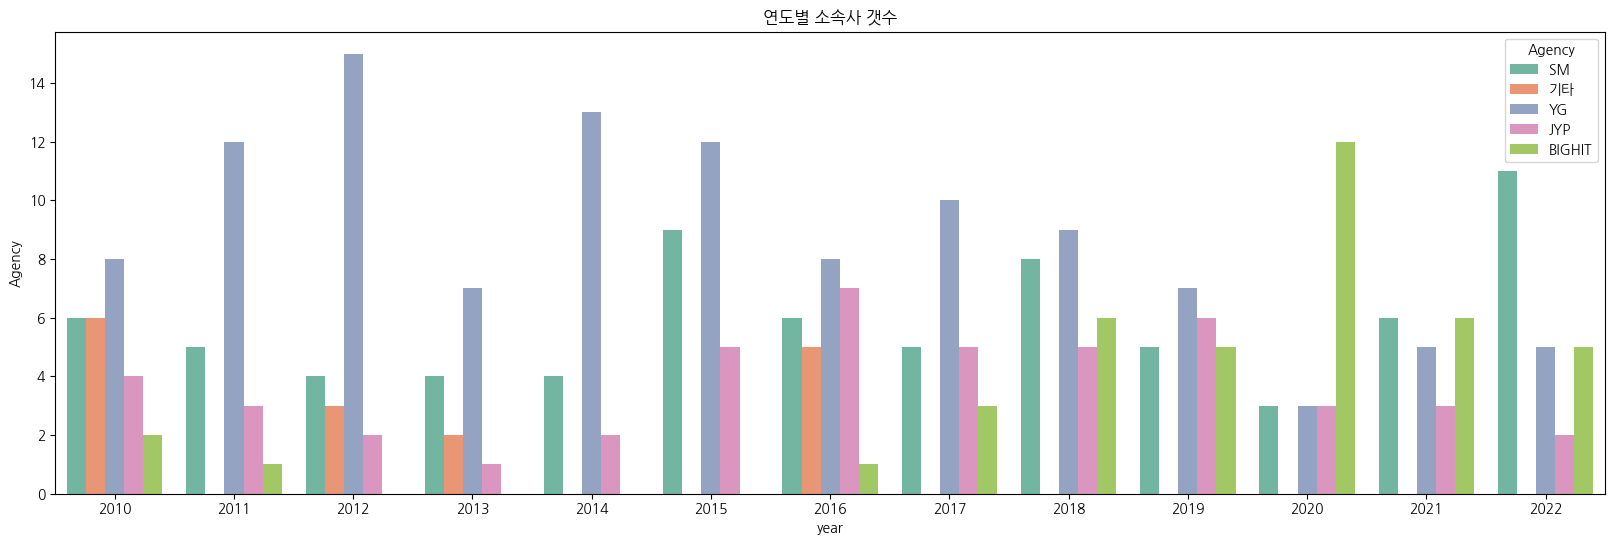

In [ ]:
# Seaborn을 사용하여 시각화
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(20, 6))
sns.countplot(x='year', data=ag, hue='agency', palette='Set2')
plt.title('연도별 소속사 갯수')
plt.xlabel('year')
plt.ylabel('Agency')
plt.legend(title='Agency', loc='upper right')
plt.show()

In [ ]:
tmp = ag[ag['agency'] != '기타']

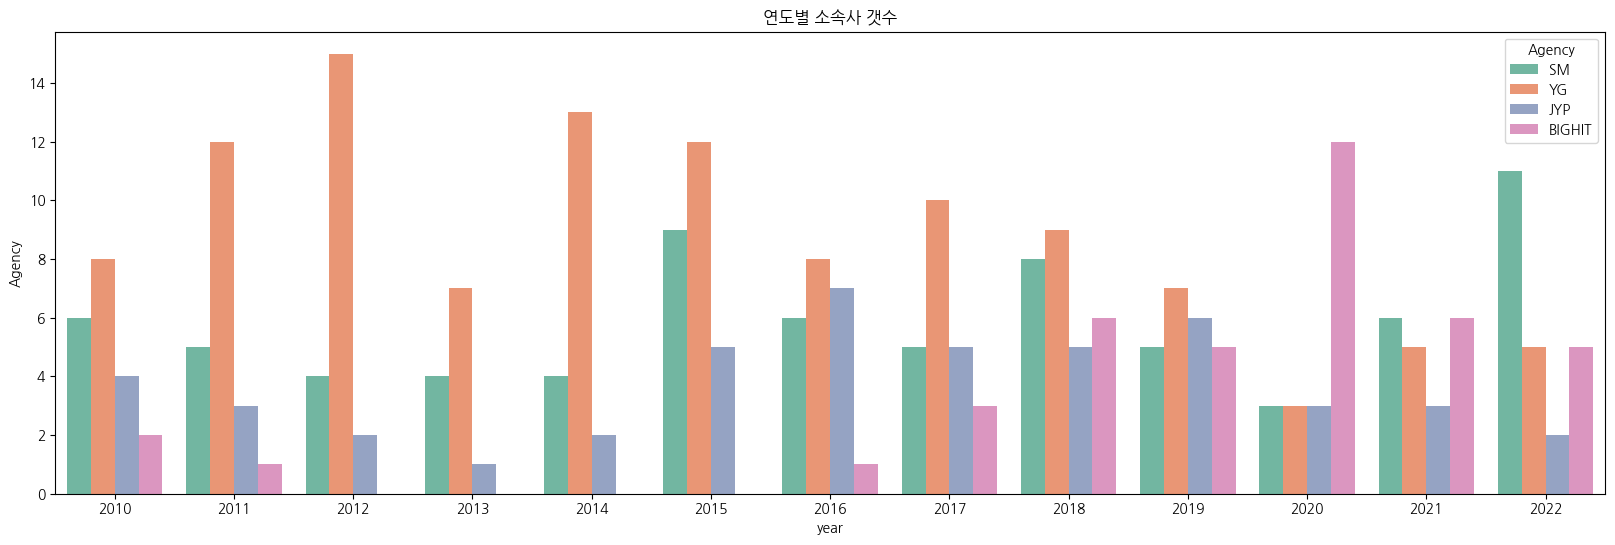

In [ ]:
# Seaborn을 사용하여 시각화
plt.rcParams['font.family'] = 'NanumGothic'
plt.figure(figsize=(20, 6))
sns.countplot(x='year', data=tmp, hue='agency', palette='Set2')
plt.title('연도별 소속사 갯수')
plt.xlabel('year')
plt.ylabel('Agency')
plt.legend(title='Agency', loc='upper right')
plt.show()

In [ ]:
df_sel.head(3)

,year,Agency
0,2022년,스타쉽엔터테인먼트
1,2022년,큐브 엔터테인먼트
2,2022년,큐브 엔터테인먼트


In [ ]:
df_sel[df_sel['year'] == '2022년']

,year,Agency
0,2022년,스타쉽엔터테인먼트
1,2022년,큐브 엔터테인먼트
2,2022년,큐브 엔터테인먼트
3,2022년,프로젝트 리본
4,2022년,플렉스엠
...,...,...
142,2022년,(주)MAKTUB Company
146,2022년,"스튜디오 마음C, 화앤담픽쳐스"
147,2022년,TOON STUDIO
150,2022년,모스트콘텐츠


In [ ]:
df_sel['Agency'].unique()

array(['스타쉽엔터테인먼트', '큐브 엔터테인먼트', '프로젝트 리본', '플렉스엠', '모스트콘텐츠',
       'YG Entertainment', '에버그로우', 'P NATION', 'H1GHR MUSIC RECORDS',
       '쇼플레이엔터테인먼트', 'SM ENTERTAINMENT', 'Stone Music Entertainment',
       'ADOR', 'MORE VISION', '꿈의엔진', '문화방송',
       'BIGPLANETMADE, SWING ENTERTAINMENT, 페임어스 엔터테인먼트', 'EDAM엔터테인먼트',
       '㈜SBS콘텐츠허브', 'IN A MILLION', 'NK COMPANY', '주식회사 레시피뮤직',
       'BIGHIT MUSIC', '위에화엔터테인먼트코리아', '쏘스뮤직', '도토리뮤직',
       'BPM ENTERTAINMENT, FameUs Entertainment', 'SM Entertainment',
       'TV CHOSUN', 'NEOKIDZ', '더그루브엔터테인먼트', '물고기뮤직', '유야호',
       'C9 Entertainment', '㈜JYP엔터테인먼트', '매직스트로베리사운드', '탑현월드',
       '(주)YG엔터테인먼트', '쇼파르엔터테인먼트', '영앤리치 레코즈', '일팔 프로젝트', '카카오엔터테인먼트',
       '(주)MAKTUB Company', 'High Up Entertainment',
       '카카오엔터테인먼트, 민트페이퍼, 광합성', '(주)JYP엔터테인먼트', '브레이브 엔터테인먼트', '피네이션',
       'WM Entertainment', 'LOVE MANEUVER', '넥스타엔터테인먼트', '피네이션 주식회사',
       '뷰티플노이즈', 'TOON STUDIO', '방구석캐스팅', '스튜디오 마음C, 화앤담픽쳐스', '뮤직원 컴퍼니',
       '㈜뮤직디자인', '버스커버스커', 

In [ ]:
df[['year','Agency', 'Genre']].groupby(['year','Agency']).count().sort_values('Genre', ascending=False).head(30)

,,Genre
year,Agency,
2012년,(주)YG엔터테인먼트,15
2016년,Stone Music Entertainment,14
2012년,Stone Music Entertainment,13
2014년,(주)YG엔터테인먼트,13
2015년,(주)YG엔터테인먼트,12
2011년,(주)YG엔터테인먼트,12
2020년,BIGHIT MUSIC,12
2015년,Stone Music Entertainment,11
2017년,(주)YG엔터테인먼트,10


In [ ]:
tmp = df[['year','Agency', 'Genre']].groupby(['year','Agency']).count().sort_values('Genre', ascending=False)

In [ ]:
tmp[tmp['Genre'] >= 5].shape

(65, 1)

In [ ]:
tmp[tmp['Genre'] >= 6].shape

(44, 1)

In [ ]:
year_agency_10_up = tmp[tmp['Genre'] >= 10]

In [ ]:
year_agency_10_up.reset_index(inplace=True)

In [ ]:
print(year_agency_10_up.shape)
year_agency_10_up.sort_values('year')

(11, 3)


,year,Agency,Genre
5,2011년,(주)YG엔터테인먼트,12
0,2012년,(주)YG엔터테인먼트,15
2,2012년,Stone Music Entertainment,13
3,2014년,(주)YG엔터테인먼트,13
4,2015년,(주)YG엔터테인먼트,12
7,2015년,Stone Music Entertainment,11
1,2016년,Stone Music Entertainment,14
8,2017년,(주)YG엔터테인먼트,10
10,2017년,Stone Music Entertainment,10
6,2020년,BIGHIT MUSIC,12


In [ ]:
cnt = 10
print(tmp[tmp['Genre'] >= cnt].shape)
tmp[tmp['Genre'] >= cnt]

(11, 1)


,,Genre
year,Agency,
2012년,(주)YG엔터테인먼트,15
2016년,Stone Music Entertainment,14
2012년,Stone Music Entertainment,13
2014년,(주)YG엔터테인먼트,13
2015년,(주)YG엔터테인먼트,12
2011년,(주)YG엔터테인먼트,12
2020년,BIGHIT MUSIC,12
2015년,Stone Music Entertainment,11
2017년,(주)YG엔터테인먼트,10


In [ ]:
cnt = 8
print(tmp[tmp['Genre'] >= cnt].shape)
tmp[tmp['Genre'] >= cnt]

(20, 1)


,,Genre
year,Agency,
2012년,(주)YG엔터테인먼트,15
2016년,Stone Music Entertainment,14
2012년,Stone Music Entertainment,13
2014년,(주)YG엔터테인먼트,13
2015년,(주)YG엔터테인먼트,12
2011년,(주)YG엔터테인먼트,12
2020년,BIGHIT MUSIC,12
2015년,Stone Music Entertainment,11
2017년,(주)YG엔터테인먼트,10
